<a href="https://colab.research.google.com/github/jwar28/data-science-books/blob/main/Cuaderno_4_Red_Neuronal_Clasificaci%C3%B3n_(Redes_densas).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Cuaderno 4. Redes densas

Este taller tipico de clasificación te ayudará a explicar el concepto de redes neuronales profundas, en donde más de una capa es necesaria para resolver un problema no linealmente separable, como en el caso de los círculos concéntricos que estás utilizando en este ejemplo.

**Descripción del Taller:**

* Objetivo: Mostrar cómo un problema no lineal (clasificación de dos círculos concéntricos, donde el primer circulo pertenece a una clase y el externo a otra clase. Ver imagen) requiere múltiples capas (redes neuronales profundas) para ser resuelto correctamente.

* Enfoque: Primero, se construye un modelo simple con una sola capa, luego se amplía a un modelo más complejo con más capas, y se comparan los resultados.

* Explicación de las capas: Al explicar las redes profundas, es importante mencionar cómo las capas ocultas y las funciones de activación trabajan para transformar el espacio de características de manera que el modelo pueda aprender patrones más complejos.


 # Generación de los datos artificiales
 En esta celda se generan los datos con make_circles, que crea dos clases de puntos distribuidos en dos círculos concéntricos, un problema que no puede ser resuelto de manera lineal.

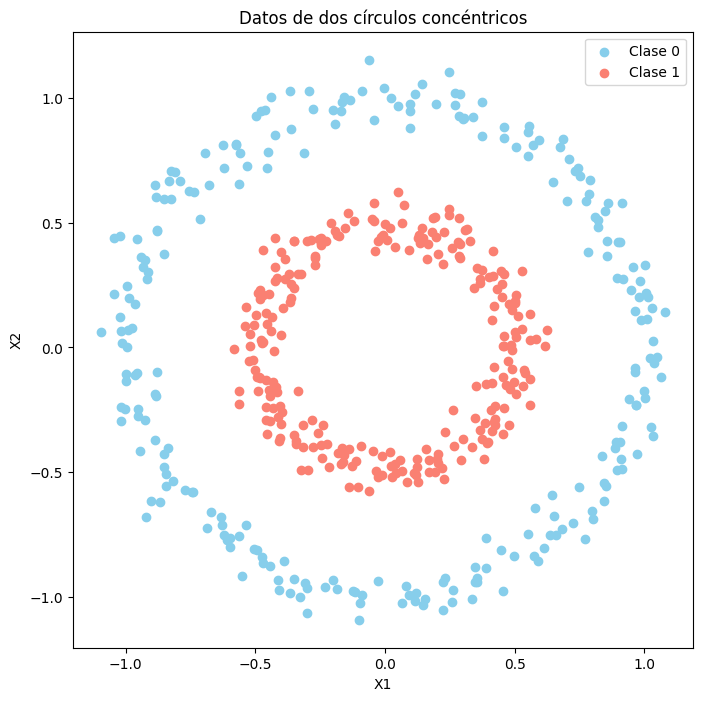

In [ ]:
# Importamos las librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

# Set the seed for reproducibility
np.random.seed(42)

# Creamos nuestros datos artificiales (dos círculos concéntricos)
X, Y = make_circles(n_samples=500, factor=0.5, noise=0.05)

# Visualización de los datos generados
plt.figure(figsize=(8, 8))
plt.scatter(X[Y == 0, 0], X[Y == 0, 1], c="skyblue", label="Clase 0")
plt.scatter(X[Y == 1, 0], X[Y == 1, 1], c="salmon", label="Clase 1")
plt.title("Datos de dos círculos concéntricos")
plt.xlabel("X1")
plt.ylabel("X2")
plt.legend()
plt.show()


In [ ]:
# Crear el DataFrame
df = pd.DataFrame(X, columns=['X1', 'X2'])  # Columnas X1 y X2 para las características
df['Y'] = Y  # Añadimos la columna de etiquetas Y

# Mostramos las primeras filas del DataFrame
df.head()

#Este paso no es necesario, ya que podemos trabajar con los arreglos directamente

,X1,X2,Y
0,-0.469276,0.210118,1
1,-0.164164,0.986075,0
2,-0.471454,0.019974,1
3,-0.670347,-0.657977,0
4,-0.826468,0.594071,0



#Modelo de Red Neuronal con una Capa


In [ ]:
# Importamos las librerías de Keras
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

# Creamos el modelo con una sola capa
model_single_layer = Sequential([
    Input(shape=(2,)),  # Define explícitamente la forma de entrada como 2 características
    Dense(1, activation='sigmoid')  # Capa de salida con 1 neurona
])

#Se usa un sola nuerona porque como solo son dos clases [0,1] se requiere una sola neurona para clasficar ese valor.


In [ ]:
model_single_layer.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 1)                   │               3 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3 (12.00 B)

 Trainable params: 3 (12.00 B)

 Non-trainable params: 0 (0.00 B)

# Explicación de Funciones de Activación

Las **funciones de activación** son fundamentales para introducir no linealidad en la red neuronal, permitiendo que la red pueda aprender patrones más complejos.

1. **ReLU (Rectified Linear Unit)**:
   - Es la función de activación más común en las capas ocultas.
   - Se define como `f(x) = max(0, x)`.
   - Tiene una propiedad importante: no satura a valores positivos, lo que ayuda a mitigar el problema del desvanecimiento del gradiente en redes profundas.

2. **Sigmoide**:
   - Se utiliza comúnmente en la capa de salida para problemas de clasificación binaria.
   - Su función se define como `f(x) = 1 / (1 + exp(-x))`, produciendo valores en el rango [0, 1].
   - Esto hace que sea adecuado para problemas en los que queremos probabilidades de pertenencia a una clase.



In [ ]:
X,Y

(array([[-4.69276248e-01,  2.10118226e-01],
        [-1.64164375e-01,  9.86075381e-01],
        [-4.71453676e-01,  1.99741343e-02],
        [-6.70346838e-01, -6.57977105e-01],
        [-8.26468133e-01,  5.94071043e-01],
        [-4.32719009e-01, -2.43338043e-01],
        [-4.77054011e-01,  3.16899568e-02],
        [-9.74612851e-01,  7.81620244e-02],
        [-1.71239032e-01,  9.47057214e-01],
        [ 1.27256616e-01, -5.38897373e-01],
        [ 9.80041852e-01,  2.02769492e-01],
        [ 2.24147733e-01, -1.05124716e+00],
        [-2.78021705e-01, -4.00385002e-01],
        [-5.76351076e-01,  8.16294090e-01],
        [-3.99911504e-01,  4.81766006e-02],
        [-4.47077377e-01, -1.69666392e-01],
        [ 4.91553419e-01, -8.79606194e-02],
        [ 7.31505825e-01,  7.09277101e-01],
        [ 3.99896772e-02,  4.04343361e-01],
        [-2.57125389e-01, -3.42358537e-01],
        [ 4.65903441e-01, -1.51731118e-01],
        [ 5.39447219e-01, -1.00686454e-01],
        [ 2.87781058e-01,  3.604

In [ ]:
#len(X)/32
#lotes=16

In [ ]:

# Compilamos el modelo
model_single_layer.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


#optimizador="adam"
#tasa_aprendizaje=0.03
#model_single_layer.compile(optimizer=optimzador, learning_rate=tasa_aprendizaje, loss='binary_crossentropy', metrics=['accuracy'])

historia= model_single_layer.fit(X, Y, epochs=100, batch_size=32, verbose=True)

#Cuantos lotes se ejecutan en cada epoca = 16 = int(500/32), int(tamaño del dataset/tamaño de lotes)

Epoch 1/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.5110 - loss: 0.7979
Epoch 2/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5001 - loss: 0.7917
Epoch 3/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4939 - loss: 0.7856  
Epoch 4/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4651 - loss: 0.8432 
Epoch 5/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4911 - loss: 0.7977
Epoch 6/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4928 - loss: 0.8014
Epoch 7/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4747 - loss: 0.8026
Epoch 8/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4772 - loss: 0.7994
Epoch 9/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5178 - loss: 0.7696 
Epoch 10/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4893 - loss: 0.7955 
Epoch 11/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4843 - loss: 0.7945 
Epoch 12/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - a

In [ ]:
# Evaluamos el modelo
perdidas, accuracy = model_single_layer.evaluate(X, Y, verbose=True)


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5082 - loss: 0.7033  


In [ ]:
# Assuming 'model_single_layer' is already defined and trained as in the provided code.
prediction = model_single_layer.predict(np.array([[0.7, 0.5]]))

# The prediction will be a probability between 0 and 1.
# We can classify based on a threshold (e.g., 0.5).
predicted_class = 1 if prediction > 0.5 else 0

print(f"Prediction probability: {prediction[0][0]}")
print(f"Predicted class: {predicted_class}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
Prediction probability: 0.5020333528518677
Predicted class: 1


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 818us/step


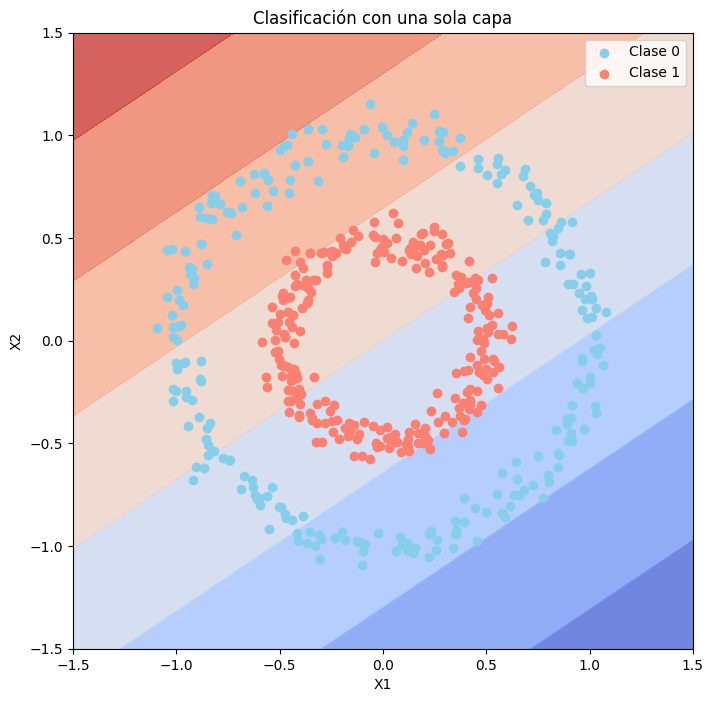

In [ ]:
# Visualización del mapa de predicción para el modelo de una capa
xx, yy = np.meshgrid(np.linspace(-1.5, 1.5, 100), np.linspace(-1.5, 1.5, 100))
grid = np.c_[xx.ravel(), yy.ravel()]
predictions = model_single_layer.predict(grid).reshape(xx.shape)

# Visualizamos la clasificación
plt.figure(figsize=(8, 8))
plt.contourf(xx, yy, predictions, cmap="coolwarm", alpha=0.8)
plt.scatter(X[Y == 0, 0], X[Y == 0, 1], c="skyblue", label="Clase 0")
plt.scatter(X[Y == 1, 0], X[Y == 1, 1], c="salmon", label="Clase 1")
plt.title("Clasificación con una sola capa")
plt.xlabel("X1")
plt.ylabel("X2")
plt.legend()
plt.show()



In [ ]:
# Imprimir la precisión del modelo
print(f"Precisión del modelo de una capa: {accuracy:.2f}")


Precisión del modelo de una capa: 0.51


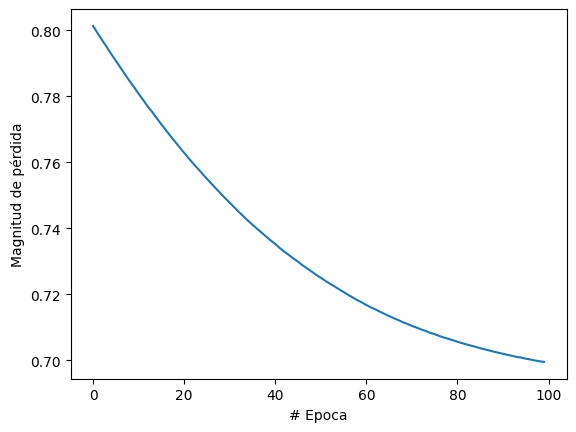

In [ ]:
import matplotlib.pyplot as plt
plt.xlabel("# Epoca")
plt.ylabel("Magnitud de pérdida")
plt.plot(historia.history["loss"])

##Conclusión: Como el problema no es lineal, una sola capa probablemente no será capaz de separar correctamente las dos clases (círculos).

#Modelo de Red Neuronal con Más Capas
Este taller te ayudará a explicar el concepto de redes neuronales profundas, en donde más de una capa es necesaria para resolver un problema no linealmente separable, como en el caso de los círculos concéntricos que estás utilizando en este ejemplo.

**Descripción del Taller:**

* Objetivo: Mostrar cómo un problema no lineal (clasificación de dos círculos concéntricos) requiere múltiples capas (redes neuronales profundas) para ser resuelto correctamente.

* Enfoque: Primero, se construye un modelo simple con una sola capa, luego se amplía a un modelo más complejo con más capas, y se comparan los resultados.

* Explicación de las capas: Al explicar las redes profundas, es importante mencionar cómo las capas ocultas y las funciones de activación trabajan para transformar el espacio de características de manera que el modelo pueda aprender patrones más complejos.


Aqui la elección de las funciones de activación afecta directamente a cómo el modelo aprende. En este caso, las capas ocultas utilizan **ReLU** porque ayudan a aprender representaciones no lineales, y **sigmoide** en la salida porque estamos trabajando con un problema de clasificación binaria.


In [ ]:
# Creamos el modelo con varias capas
model_deep = Sequential([
    Input(shape=(2,)),  # Capa de entrada con 2 neuronas
    Dense(8, activation='relu'),  # Capa oculta con 8 neuronas
    Dense(4, activation='relu'),                      # Capa oculta con 4 neuronas
    Dense(1, activation='sigmoid')                  # Capa de salida con 1 neurona
])

# Compilamos el modelo
model_deep.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
model_deep.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                      │ (None, 8)                   │              24 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 4)                   │              36 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 65 (260.00 B)

 Trainable params: 65 (260.00 B)

 Non-trainable params: 0 (0.00 B)

Del compile vamos a explicar lafunción de pérdida aquí usada:

La función de pérdida binary_crossentropy se utiliza comúnmente en problemas de clasificación binaria, donde las salidas del modelo son valores que representan dos clases distintas. En nuestro caso, estamos trabajando con un conjunto de datos generado por make_circles, donde las etiquetas (Y) son binarias: 0 o 1, lo que significa que estamos resolviendo un problema de clasificación binaria.


En un problema de clasificación binaria, la salida del modelo es un valor entre 0 y 1, interpretado como una probabilidad de que un ejemplo pertenezca a una de las dos clases posibles. En otras palabras, la salida del modelo se pasa generalmente por una función de activación sigmoide que convierte el valor de salida en una probabilidad. La función de pérdida binary_crossentropy mide la discrepancia entre estas probabilidades y las etiquetas reales (0 o 1).

In [ ]:
# Entrenamos el modelo con los datos
history_deep = model_deep.fit(X, Y, epochs=500, batch_size=32, verbose=True)


Epoch 1/500
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5349 - loss: 0.7290
Epoch 2/500
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5029 - loss: 0.7200 
Epoch 3/500
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5150 - loss: 0.7116 
Epoch 4/500
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4563 - loss: 0.7087 
Epoch 5/500
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4576 - loss: 0.7043 
Epoch 6/500
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4497 - loss: 0.6994 
Epoch 7/500
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4579 - loss: 0.6910 
Epoch 8/500
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4659 - loss: 0.6900 
Epoch 9/500
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4952 - loss: 0.6855 
Epoch 10/500
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4597 - loss: 0.6839 
Epoch 11/500
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4606 - loss: 0.6752 
Epoch 12/500
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step -

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 995us/step


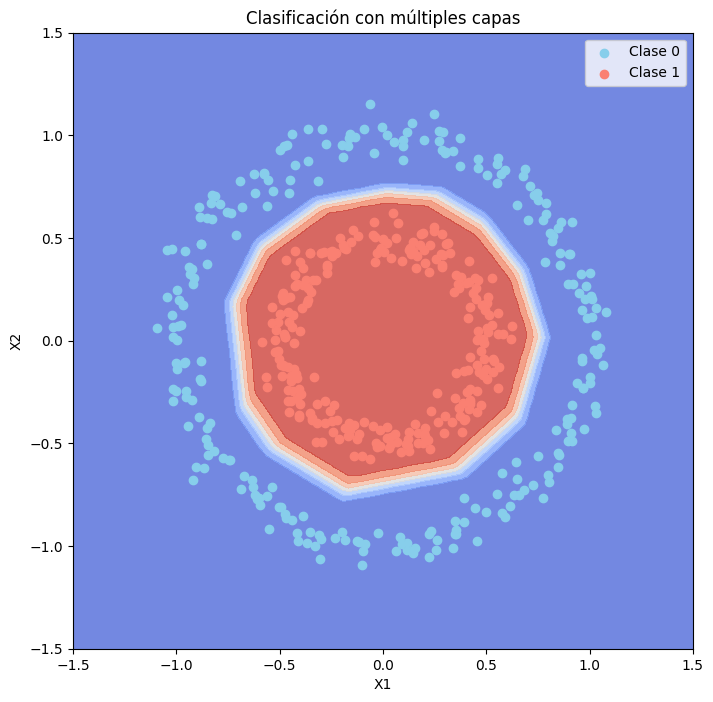

In [ ]:
# Evaluamos el modelo
loss_deep, accuracy_deep = model_deep.evaluate(X, Y, verbose=0)

# Visualización del mapa de predicción para el modelo de varias capas
predictions_deep = model_deep.predict(grid).reshape(xx.shape)

# Visualizamos la clasificación
plt.figure(figsize=(8, 8))
plt.contourf(xx, yy, predictions_deep, cmap="coolwarm", alpha=0.8)
plt.scatter(X[Y == 0, 0], X[Y == 0, 1], c="skyblue", label="Clase 0")
plt.scatter(X[Y == 1, 0], X[Y == 1, 1], c="salmon", label="Clase 1")
plt.title("Clasificación con múltiples capas")
plt.xlabel("X1")
plt.ylabel("X2")
plt.legend()
plt.show()



In [ ]:
# Imprimir la precisión del modelo
print(f"Precisión del modelo con múltiples capas: {accuracy_deep:.2f}")

Precisión del modelo con múltiples capas: 1.00


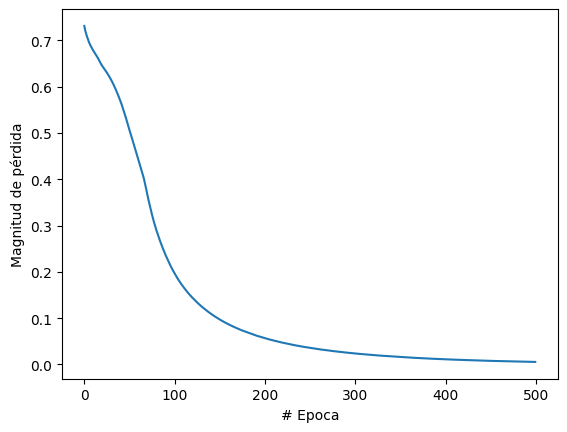

In [ ]:
import matplotlib.pyplot as plt
plt.xlabel("# Epoca")
plt.ylabel("Magnitud de pérdida")
plt.plot(history_deep.history["loss"])

In [ ]:
# prompt: poner early stoping a history_deep = model_deep.fit(X, Y, epochs=500, ,batch_size=32, verbose=True)

from tensorflow.keras.callbacks import EarlyStopping

# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=5, min_delta=1e-4, restore_best_weights=True)

# Train the model with early stopping
history_deep = model_deep.fit(X, Y, epochs=500, batch_size=32, verbose=True, validation_split=0.2, callbacks=[early_stopping])

Epoch 1/500
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 1.0000 - loss: 0.0056 - val_accuracy: 1.0000 - val_loss: 0.0061
Epoch 2/500
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 1.0000 - loss: 0.0056 - val_accuracy: 1.0000 - val_loss: 0.0061
Epoch 3/500
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 1.0000 - loss: 0.0055 - val_accuracy: 1.0000 - val_loss: 0.0060
Epoch 4/500
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 1.0000 - loss: 0.0058 - val_accuracy: 1.0000 - val_loss: 0.0060
Epoch 5/500
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 1.0000 - loss: 0.0054 - val_accuracy: 1.0000 - val_loss: 0.0060
Epoch 6/500
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 1.0000 - loss: 0.0050 - val_accuracy: 1.0000 - val_loss: 0.0060
Epoch 7/500
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 0.0053 - val_accuracy: 1.0000 - val_loss: 0.0059
Epoch 8/500
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 1.0000 - loss: 0.0050 - val_accuracy: 1.0000 - 

In [ ]:
# prompt: recueperar los weight y los bias del modelo con early stoping

import numpy as np

# Assuming 'model_deep' is your trained model with early stopping applied

# Get the weights and biases for each layer
for i, layer in enumerate(model_deep.layers):
  weights = layer.get_weights()[0]
  biases = layer.get_weights()[1]
  print(f"Layer {i+1}:")
  print("Weights:")
  print(weights)
  print("Biases:")
  print(biases)
  print("-" * 20)

# Example of accessing weights and biases of a specific layer (e.g., the first hidden layer)
first_hidden_layer_weights = model_deep.layers[1].get_weights()[0]
first_hidden_layer_biases = model_deep.layers[1].get_weights()[1]

print("Weights of the first hidden layer:\n", first_hidden_layer_weights)
print("\nBiases of the first hidden layer:\n", first_hidden_layer_biases)


Layer 1:
Weights:
[[ 0.08480416  1.1947176   0.9506862   1.1945218   0.19069363  0.32726467
  -0.81786275 -1.1864039 ]
 [ 0.0784459   0.72586745  1.1485658  -1.286057    0.2379673  -0.06543537
  -1.3188062   0.9334888 ]
 [-0.38779163  1.4603286   1.2476077   0.7429437  -1.671123   -1.700652
   1.13742     1.3359538 ]]
Biases:
[ 0.35126016 -0.10380794 -0.09237873 -0.02317937  0.70146686  0.6733668
 -0.1275865   0.00563087]
--------------------
Layer 2:
Weights:
[[ 0.40260595 -0.44575182  0.85676986 -0.20107573]
 [-0.33915704  0.8606201  -0.78740185  0.44818625]
 [-0.17754239  1.1455814  -0.57918024  1.193729  ]
 [-0.522046    1.203936   -0.22808008  1.2960078 ]
 [-0.24397865 -0.9023762   1.2049183   0.09066464]
 [ 0.02793527 -0.6774394   1.0871177  -1.1501251 ]
 [-0.46973503  0.8241208  -0.65446436  1.1370739 ]
 [-0.3827512   1.6298966  -0.24083528  0.95762026]]
Biases:
[ 0.         -0.02868132  0.8355759  -0.30313733]
--------------------
Layer 3:
Weights:
[[-0.763028 ]
 [-2.4206843]
 

#Conclusión

Este modelo tiene dos capas ocultas con 8 y 4 neuronas y funciones de activación ReLU para las capas ocultas. La capa de salida sigue usando sigmoide.

**Resultado esperado:** Al tener más capas, el modelo ahora es capaz de aprender la estructura no lineal de los círculos concéntricos, lo que debería resultar en una clasificación más precisa.


#Agregar nuevas caracteristicas o features

podemos mejorar el modelo añadiendo una nueva característica, como $X_1^2$  , a las entradas. Esta transformación no lineal puede ayudar a la red neuronal a capturar patrones más complejos, especialmente en un problema no lineal como los círculos concéntricos.

Es decir vamos a tener $X_1$ , $X_2$ y $X_1^2$ (Ahora serán tres entradas donde una de ellas es la multiplicación de X1 y X2 y el resultado se elevó al cuadrado, llamado truco de kernel polinomial cuando estuvimos estudiando SVM).


In [ ]:
# Crear el DataFrame
df = pd.DataFrame(X, columns=['X1', 'X2'])
df['Y'] = Y

# Añadir la nueva característica X1^2
df['X1X2^2'] = (df['X1']*df['X2']) ** 2


# Visualizamos las primeras filas del DataFrame
df.head()

,X1,X2,Y,X1X2^2
0,-0.469276,0.210118,1,0.009723
1,-0.164164,0.986075,0,0.026205
2,-0.471454,0.019974,1,0.000089
3,-0.670347,-0.657977,0,0.194545
4,-0.826468,0.594071,0,0.241062


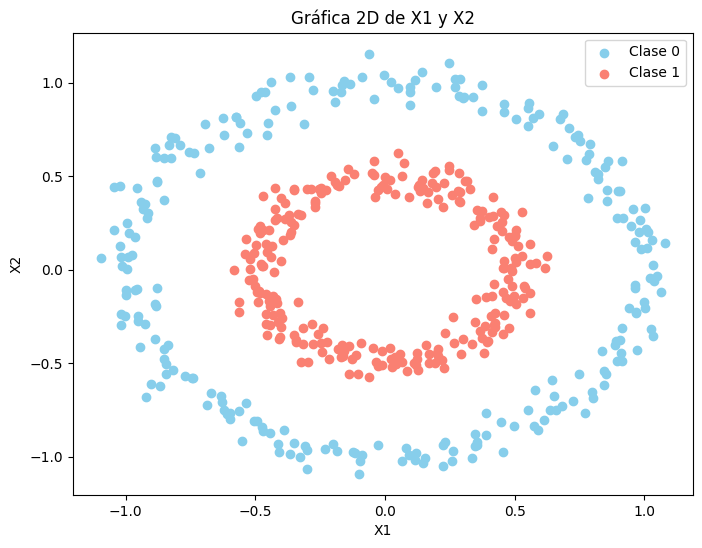

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
# Gráfica 2D (X1, X2)
plt.figure(figsize=(8, 6))
plt.scatter(X[Y == 0, 0], X[Y == 0, 1], c="skyblue", label="Clase 0")
plt.scatter(X[Y == 1, 0], X[Y == 1, 1], c="salmon", label="Clase 1")
plt.title("Gráfica 2D de X1 y X2")
plt.xlabel("X1")
plt.ylabel("X2")
plt.legend()
plt.show()

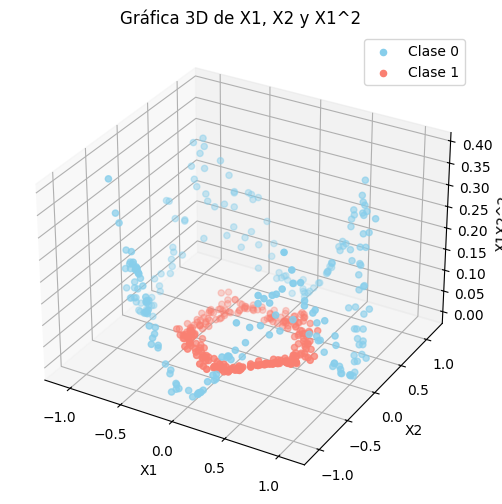

In [ ]:
# Agregar X1^2 como una nueva característica
X_square = np.column_stack([X, (X[:, 0]* X[:, 1])**2])  # Agregar X1^2 a los datos

# Gráfica 3D (X1, X2, X1^2)
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Graficar las clases en 3D
ax.scatter(X_square[Y == 0, 0], X_square[Y == 0, 1], X_square[Y == 0, 2], c="skyblue", label="Clase 0")
ax.scatter(X_square[Y == 1, 0], X_square[Y == 1, 1], X_square[Y == 1, 2], c="salmon", label="Clase 1")

# Establecer etiquetas para los ejes
ax.set_title("Gráfica 3D de X1, X2 y X1^2")
ax.set_xlabel("X1")
ax.set_ylabel("X2")
ax.set_zlabel("X1X2^2")
ax.legend()

plt.show()

In [ ]:
# Seleccionamos las características y etiquetas del DataFrame
X_new = df[['X1', 'X2', 'X1X2^2']].values  # Usamos X1, X2 y X1^2
Y_new = df['Y'].values

In [ ]:
# Creamos el modelo con varias capas
model_deep = Sequential([
    Input(shape=(3,)),  # Ahora tenemos 3 características
    Dense(8, activation='relu'),  # Capa oculta con 8 neuronas
    Dense(4, activation='relu'),  # Capa oculta con 4 neuronas
    Dense(1, activation='sigmoid')  # Capa de salida con 1 neurona
])
# Compilamos el modelo
model_deep.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
# Entrenamos el modelo con los datos
history_deep2 = model_deep.fit(X_new, Y_new, epochs=100, batch_size=32, verbose=True)

# Evaluamos el modelo
loss_deep, accuracy_deep = model_deep.evaluate(X_new, Y_new, verbose=0)

Epoch 1/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0131 
Epoch 2/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0135 
Epoch 3/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0116 
Epoch 4/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0125 
Epoch 5/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0118  
Epoch 6/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0118 
Epoch 7/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0107 
Epoch 8/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0105  
Epoch 9/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0119  
Epoch 10/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0104 
Epoch 11/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0101 
Epoch 12/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/st

In [ ]:
# Visualización del mapa de predicción para el modelo de múltiples capas
xx, yy = np.meshgrid(np.linspace(-1.5, 1.5, 100), np.linspace(-1.5, 1.5, 100))
grid = np.c_[xx.ravel(), yy.ravel()]
grid_with_new_feature = np.c_[grid, (grid[:, 0]*grid[:, 1]) ** 2]  # Añadimos X1^2 en la grilla de predicción
predictions_deep = model_deep.predict(grid_with_new_feature).reshape(xx.shape)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


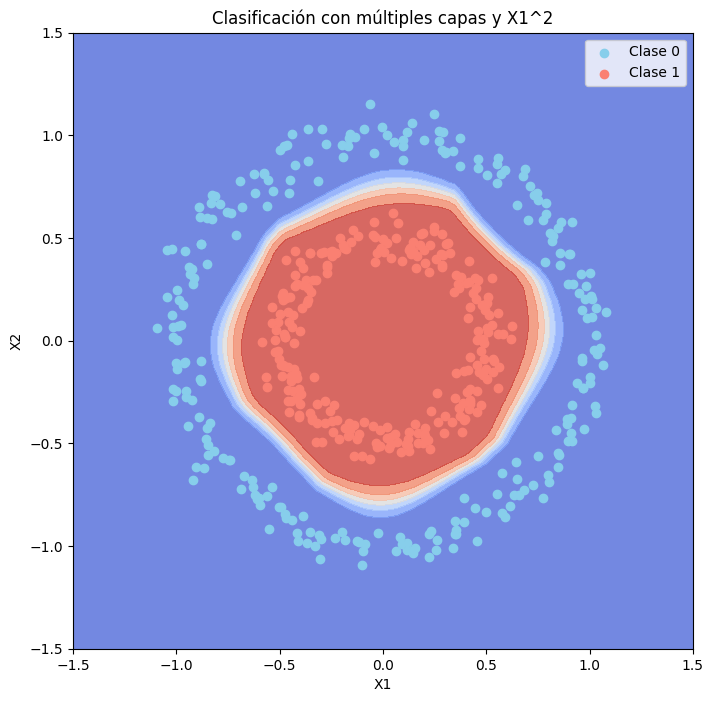

In [ ]:
# Visualizamos la clasificación
plt.figure(figsize=(8, 8))
plt.contourf(xx, yy, predictions_deep, cmap="coolwarm", alpha=0.8)
plt.scatter(X_new[Y_new == 0, 0], X_new[Y_new == 0, 1], c="skyblue", label="Clase 0")
plt.scatter(X_new[Y_new == 1, 0], X_new[Y_new == 1, 1], c="salmon", label="Clase 1")
plt.title("Clasificación con múltiples capas y X1^2")
plt.xlabel("X1")
plt.ylabel("X2")
plt.legend()
plt.show()


In [ ]:
# Imprimir la precisión del modelo
print(f"Precisión del modelo con X1X2^2: {accuracy_deep:.2f}")

Precisión del modelo con X1X2^2: 1.00


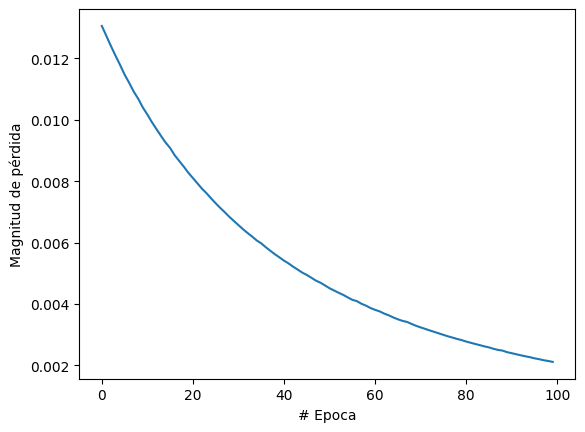

In [ ]:
import matplotlib.pyplot as plt
plt.xlabel("# Epoca")
plt.ylabel("Magnitud de pérdida")
plt.plot(history_deep2.history["loss"])